In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as web

In [14]:
start = '2015-01-01'
end = '2017-01-01'

united = web.DataReader('UAL','yahoo',start,end)
american = web.DataReader('AAL','yahoo',start,end)

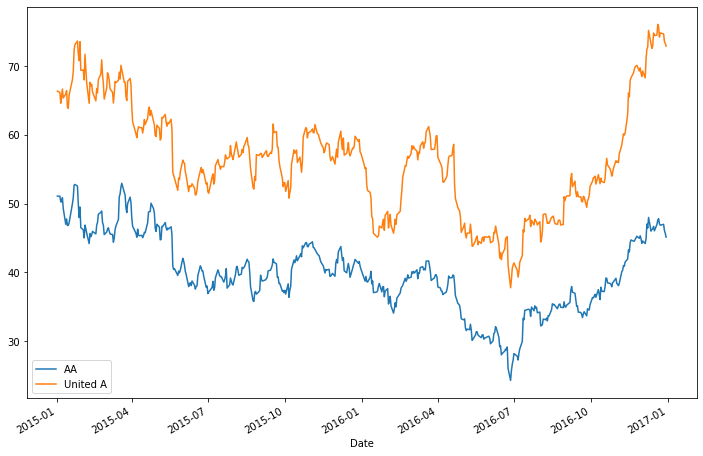

In [17]:
american['Adj Close'].plot(label='AA',figsize=(12,8))
united['Adj Close'].plot(label='United A')
plt.legend()


In [18]:
np.corrcoef(american['Adj Close'],united['Adj Close'])

array([[1.       , 0.9232614],
       [0.9232614, 1.       ]])

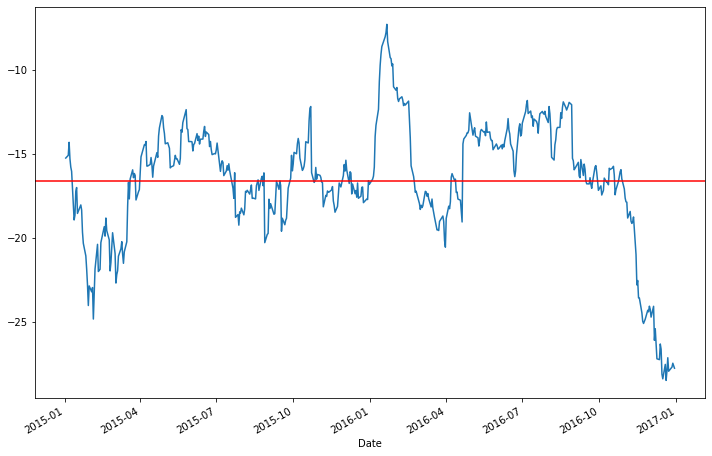

In [21]:
spread = american['Adj Close'] - united['Adj Close']
spread.plot(label='spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r')

In [28]:
def zscore(stocks):
    return ((stocks - stocks.mean())/np.std(stocks))



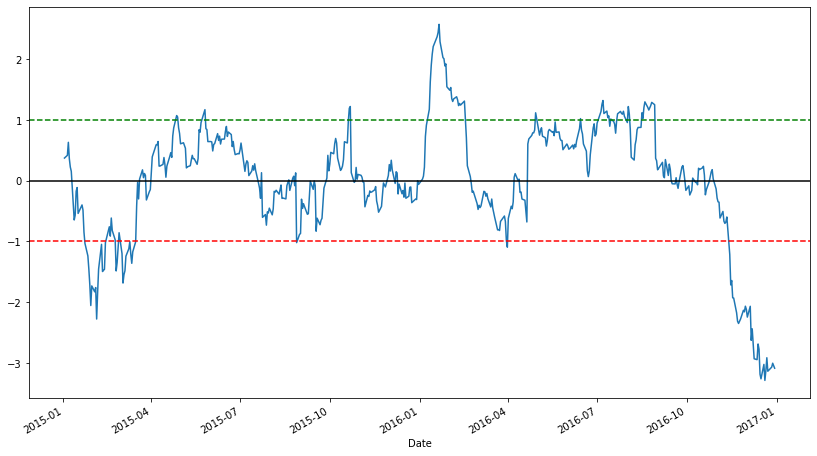

In [32]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(),c='black')
plt.axhline(1.0,c='g',ls='--')
plt.axhline(-1.0,c='r',ls='--')

In [33]:
#calculating the rolling z score because when back testing cant see future data
spread_mavg1 = spread.rolling(1).mean()
spread_mavg30 = spread.rolling(30).mean()
std_30 = spread.rolling(30).std()

zscore_30_1 =(spread_mavg1 - spread_mavg30)/std_30


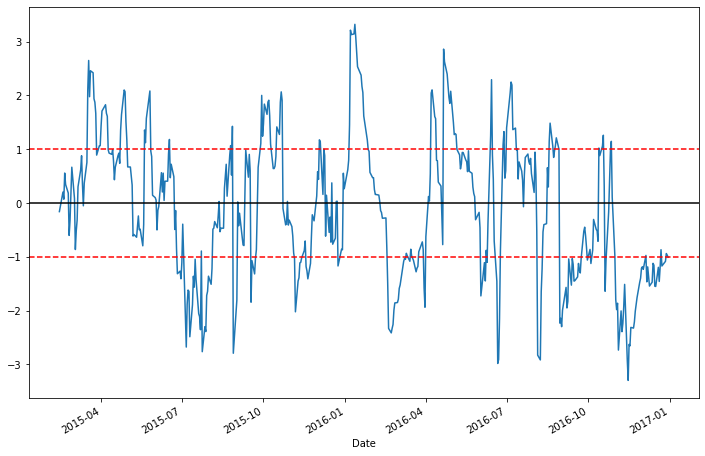

In [35]:
zscore_30_1.plot(figsize=(12,8),label='rolling 30 day Z score ')
plt.axhline(0,color='black')
plt.axhline(1,color='r',ls='--')
plt.axhline(-1,color='r',ls='--')
